In [ ]:
##1. Identify Key Observations:

In [ ]:
## Highlight at least 3 meaningful trends or patterns in the data.

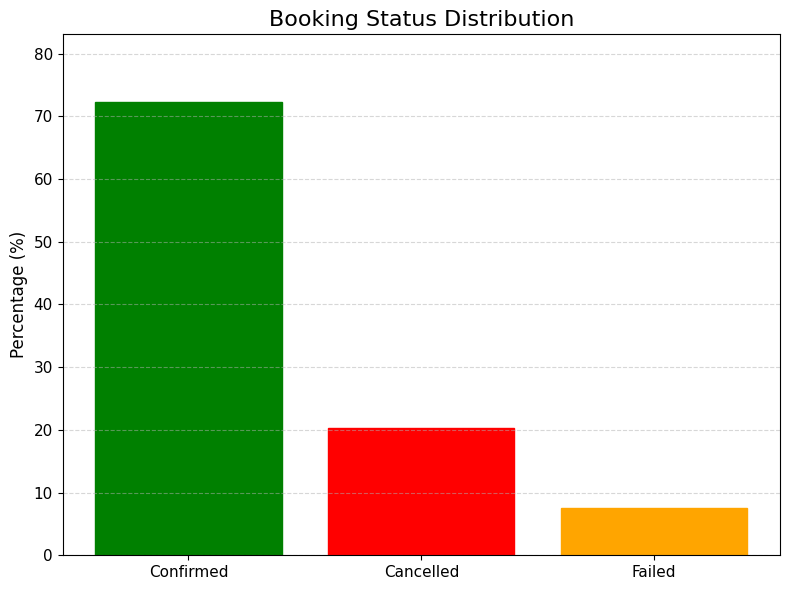

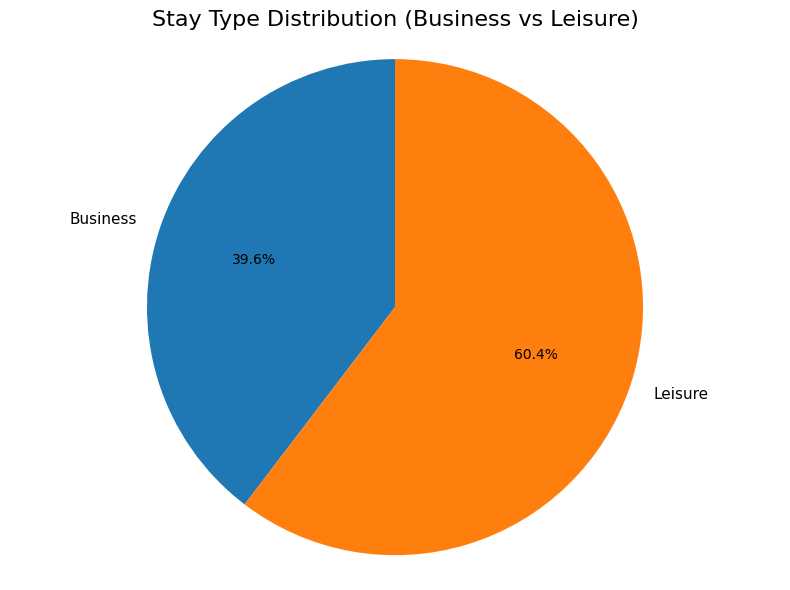

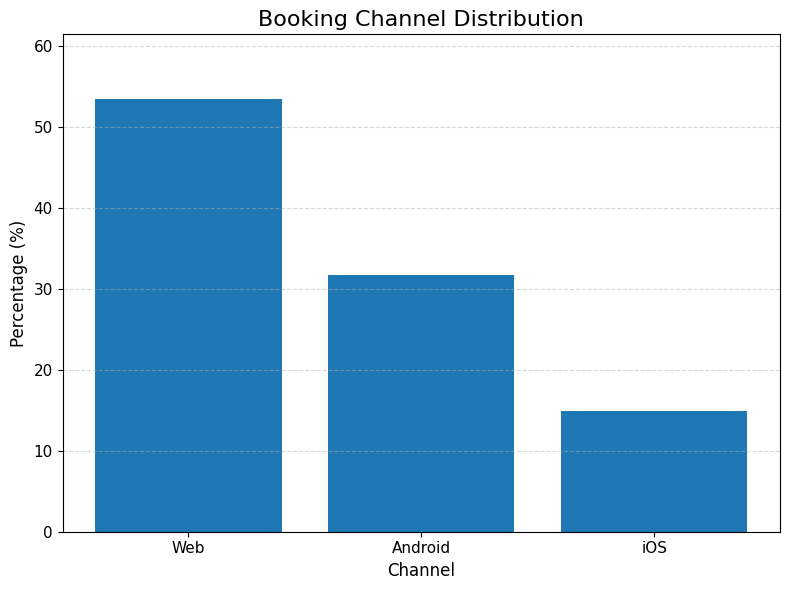

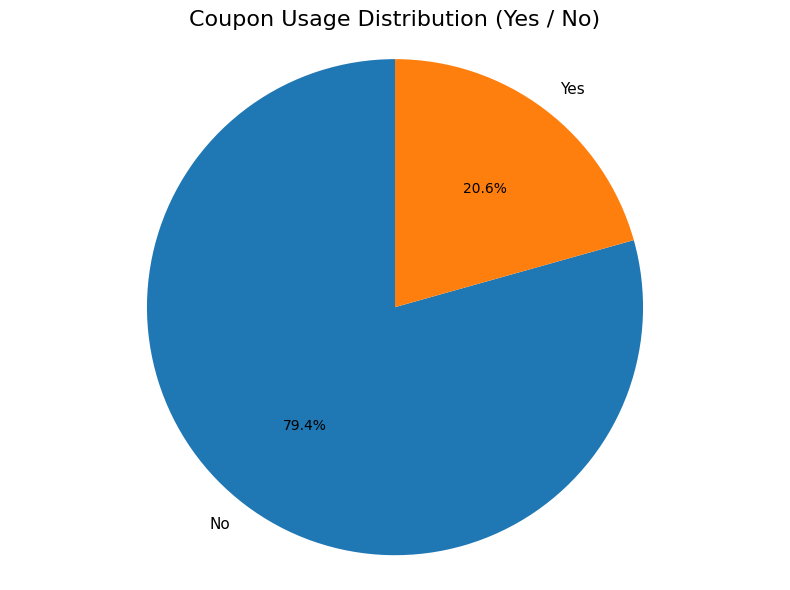

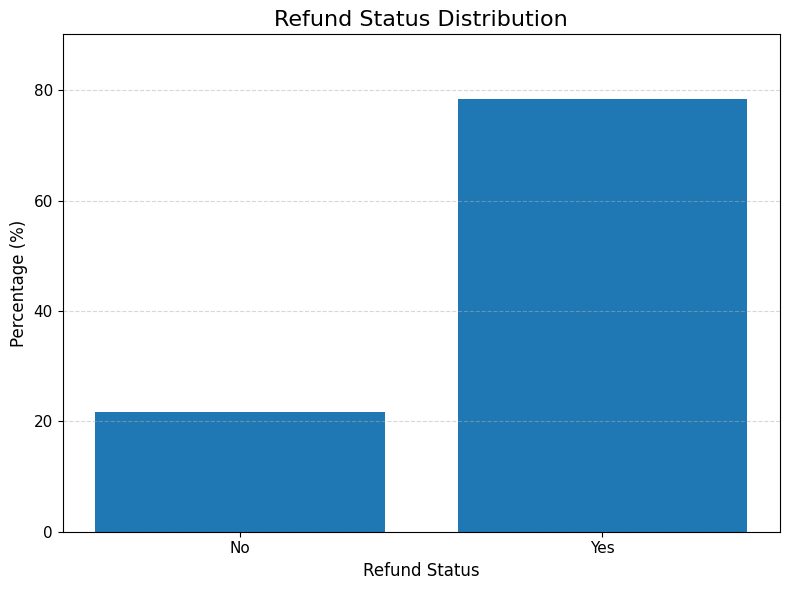


Numeric summary (percent):
Booking status:
 {'Cancelled': 20.23, 'Confirmed': 72.24, 'Failed': 7.53}
Stay type:
 {'Business': 39.63, 'Leisure': 60.37}
Booking channels:
 {'Android': 31.68, 'Web': 53.41, 'iOS': 14.91}
Coupon usage:
 {'No': 79.36, 'Yes': 20.64}
Refund status:
 {'No': 21.63, 'Yes': 78.37}


In [ ]:
# analysis_and_plots.py
# Requires: pandas, matplotlib
# Run: python analysis_and_plots.py  (or run inside a Jupyter cell)

import pandas as pd
import matplotlib.pyplot as plt

# --- Config ---
file_path = '/content/Hotel_bookings_final.csv'  # change if necessary
plt.rcParams.update({
    'figure.figsize': (8, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# --- Load data ---
df = pd.read_csv(file_path)

# --- Helper: percent series ---
def percent_series(series):
    """Return value_counts as percentages (0-100)."""
    return (series.value_counts(normalize=True) * 100).sort_index()

# --- Compute percentages for each trend ---
status_counts = percent_series(df['booking_status'])
stay_counts = percent_series(df['stay_type'])
channel_counts = percent_series(df['channel_of_booking'])
coupon_usage = percent_series(df['Coupon USed?'])
refund_status = percent_series(df['refund_status'])

# --- 1) Booking Status Distribution (bar) ---
plt.figure()
# ensure order: Confirmed, Cancelled, Failed if they exist
order = ['Confirmed', 'Cancelled', 'Failed']
values = [status_counts.get(k, 0) for k in order]
bars = plt.bar(order, values)
# optional color mapping
bars[0].set_color('green')   # Confirmed
if len(bars) > 1: bars[1].set_color('red')     # Cancelled
if len(bars) > 2: bars[2].set_color('orange')  # Failed
plt.title('Booking Status Distribution')
plt.ylabel('Percentage (%)')
plt.ylim(0, max(values) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('/mnt/data/booking_status_distribution.png', dpi=150)
plt.show()

# --- 2) Stay Type Distribution (pie) ---
plt.figure()
labels = stay_counts.index.tolist()
sizes = stay_counts.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Stay Type Distribution (Business vs Leisure)')
plt.axis('equal')
plt.tight_layout()
# plt.savefig('/mnt/data/stay_type_distribution.png', dpi=150)
plt.show()

# --- 3) Booking Channel Distribution (bar) ---
plt.figure()
# order channels by percentage descending for clearer plot
ch_order = channel_counts.sort_values(ascending=False)
plt.bar(ch_order.index, ch_order.values)
plt.title('Booking Channel Distribution')
plt.ylabel('Percentage (%)')
plt.xlabel('Channel')
plt.ylim(0, max(ch_order.values) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('/mnt/data/booking_channel_distribution.png', dpi=150)
plt.show()

# --- 4) Coupon Usage Distribution (pie) ---
plt.figure()
labels = coupon_usage.index.tolist()
sizes = coupon_usage.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Coupon Usage Distribution (Yes / No)')
plt.axis('equal')
plt.tight_layout()
# plt.savefig('/mnt/data/coupon_usage_distribution.png', dpi=150)
plt.show()

# --- 5) Refund Status Distribution (bar) ---
plt.figure()
refund_order = refund_status.sort_index()  # usually Yes / No
plt.bar(refund_order.index, refund_order.values)
plt.title('Refund Status Distribution')
plt.ylabel('Percentage (%)')
plt.xlabel('Refund Status')
plt.ylim(0, max(refund_order.values) * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig('/mnt/data/refund_status_distribution.png', dpi=150)
plt.show()

# --- Print numeric summary (optional) ---
print("\nNumeric summary (percent):")
print("Booking status:\n", status_counts.round(2).to_dict())
print("Stay type:\n", stay_counts.round(2).to_dict())
print("Booking channels:\n", channel_counts.round(2).to_dict())
print("Coupon usage:\n", coupon_usage.round(2).to_dict())
print("Refund status:\n", refund_status.round(2).to_dict())


In [ ]:
## How do booking patterns vary across channels, room types, and star ratings?


=== Confirmed bookings (percent) ===
By channel:
 {'Web': 53.29, 'Android': 31.72, 'iOS': 14.99}
By room type:
 {'Standard': 52.84, 'Deluxe': 36.9, 'Suite': 10.26}
By star rating:
 {2: 10.07, 3: 35.06, 4: 40.04, 5: 14.83}


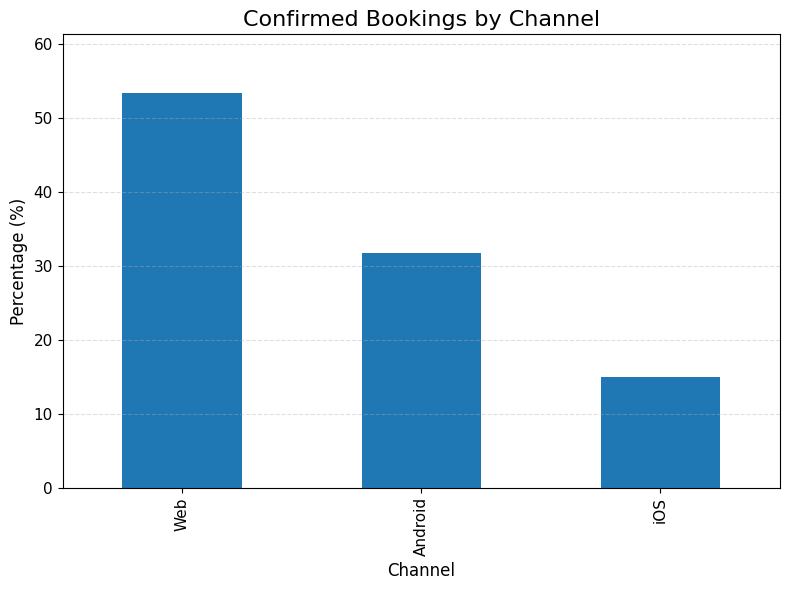

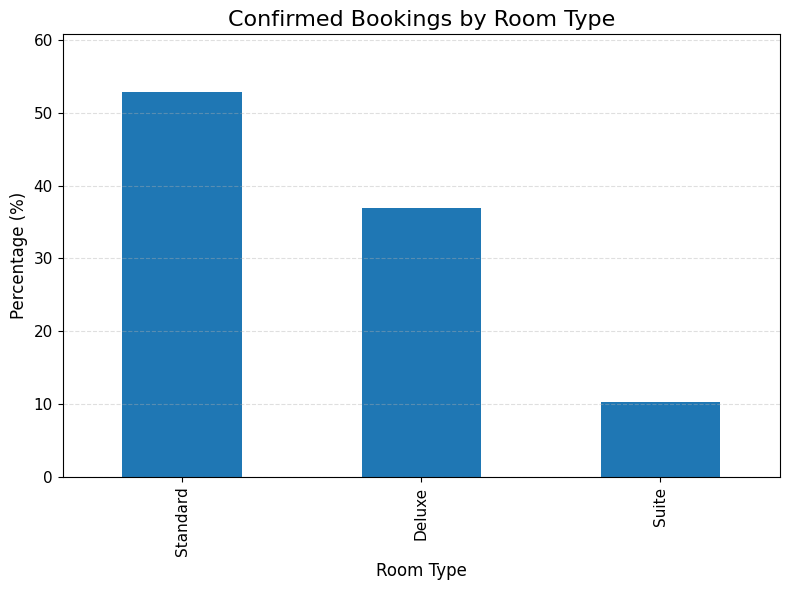

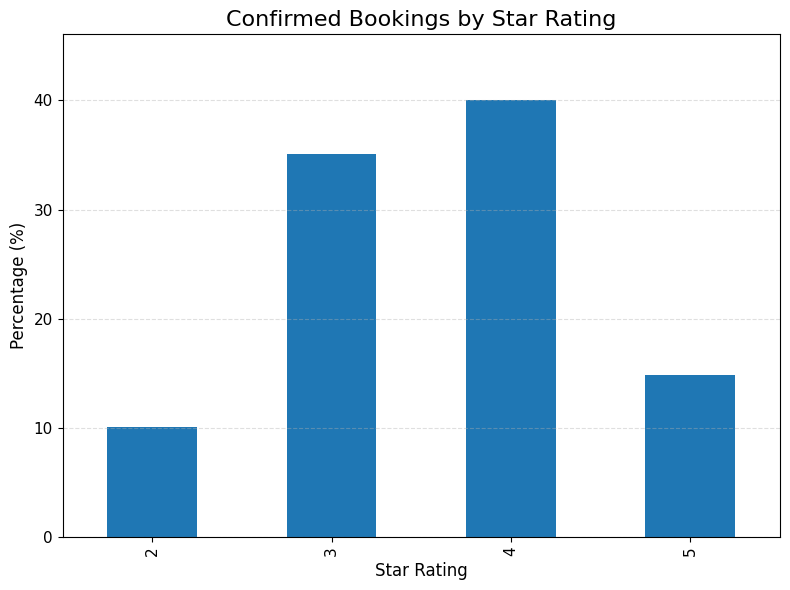

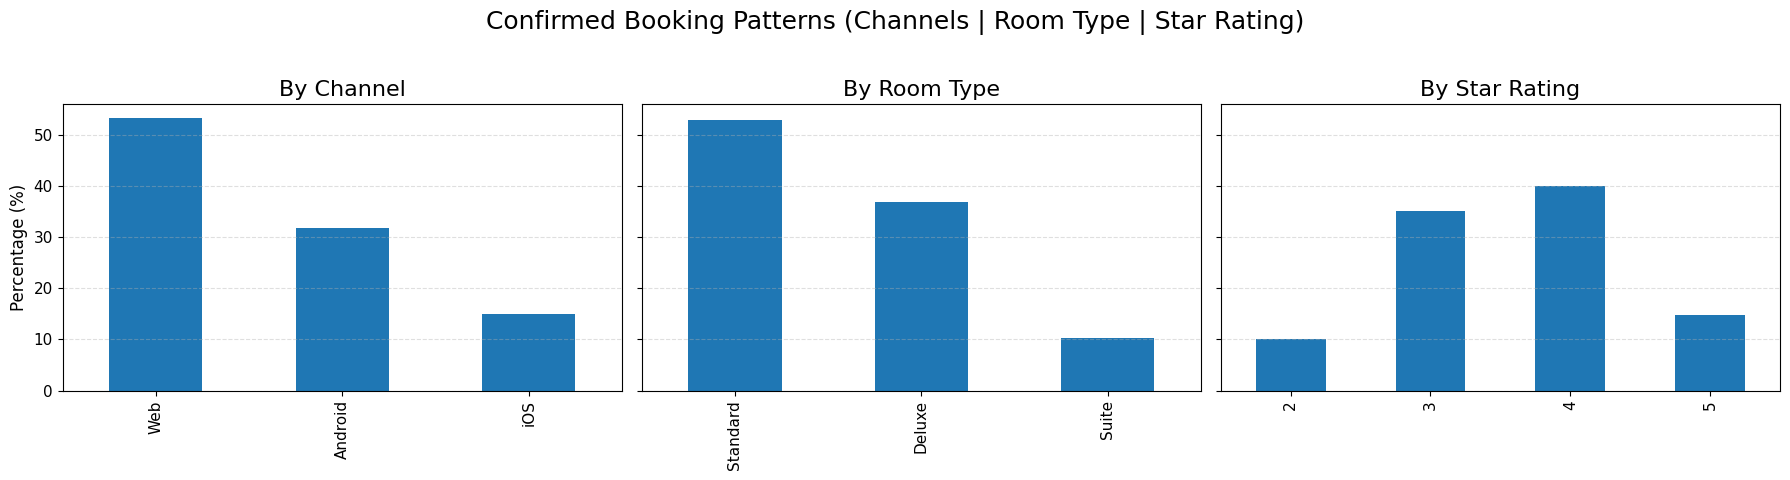

In [ ]:
# booking_patterns.py
# Requires: pandas, matplotlib
# Run: python booking_patterns.py

import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# ---------- CONFIG ----------
file_path = '/content/Hotel_bookings_final.csv'  # change if required
save_plots = False   # set True to save PNGs to disk
out_dir = Path('/mnt/data/plots')
out_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    'figure.figsize': (8, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# ---------- LOAD ----------
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}", file=sys.stderr)
    raise

# Ensure required columns exist
required_cols = {'booking_status', 'channel_of_booking', 'room_type', 'star_rating'}
missing = required_cols - set(df.columns)
if missing:
    raise KeyError(f"Missing required columns: {missing}")

# Filter to Confirmed bookings
confirmed = df[df['booking_status'] == 'Confirmed'].copy()

# Helper to compute percentage distribution (0-100)
def percent_series(series, order=None):
    s = (series.value_counts(normalize=True) * 100)
    if order:
        # preserve order; fill missing with 0
        return pd.Series({k: s.get(k, 0.0) for k in order})
    return s.sort_values(ascending=False)

# ---------- CALCULATIONS ----------
# By channel (Web, Android, iOS expected — but handle any categories)
channel_order = ['Web', 'Android', 'iOS']  # you can change order if needed
channel_pct = percent_series(confirmed['channel_of_booking'], order=channel_order)

# By room type (Standard, Deluxe, Suite expected)
room_order = ['Standard', 'Deluxe', 'Suite']
room_pct = percent_series(confirmed['room_type'], order=room_order)

# By star rating (2,3,4,5 maybe present) — sort numeric
# Convert star_rating to int (if possible)
try:
    confirmed['star_rating'] = confirmed['star_rating'].astype(int)
except Exception:
    # if already int or non-numeric, ignore
    pass
star_pct = percent_series(confirmed['star_rating'])
star_pct = star_pct.sort_index()  # ascending by star rating

# Print numeric summaries
print("\n=== Confirmed bookings (percent) ===")
print("By channel:\n", channel_pct.round(2).to_dict())
print("By room type:\n", room_pct.round(2).to_dict())
print("By star rating:\n", star_pct.round(2).to_dict())

# ---------- PLOTS ----------
# Individual charts
# 1) Channel
plt.figure()
channel_pct.plot(kind='bar')
plt.title('Confirmed Bookings by Channel')
plt.ylabel('Percentage (%)')
plt.xlabel('Channel')
plt.ylim(0, max(channel_pct.max()*1.15, 10))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
if save_plots:
    plt.savefig(out_dir / 'confirmed_by_channel.png', dpi=150)
plt.show()

# 2) Room Type
plt.figure()
room_pct.plot(kind='bar')
plt.title('Confirmed Bookings by Room Type')
plt.ylabel('Percentage (%)')
plt.xlabel('Room Type')
plt.ylim(0, max(room_pct.max()*1.15, 10))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
if save_plots:
    plt.savefig(out_dir / 'confirmed_by_room_type.png', dpi=150)
plt.show()

# 3) Star Rating
plt.figure()
star_pct.plot(kind='bar')
plt.title('Confirmed Bookings by Star Rating')
plt.ylabel('Percentage (%)')
plt.xlabel('Star Rating')
plt.ylim(0, max(star_pct.max()*1.15, 10))
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
if save_plots:
    plt.savefig(out_dir / 'confirmed_by_star_rating.png', dpi=150)
plt.show()

# 4) Combined side-by-side for quick comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
# Channel
channel_pct.plot(kind='bar', ax=axes[0])
axes[0].set_title('By Channel')
axes[0].set_xlabel('')
axes[0].set_ylabel('Percentage (%)')
axes[0].grid(axis='y', linestyle='--', alpha=0.4)
# Room
room_pct.plot(kind='bar', ax=axes[1])
axes[1].set_title('By Room Type')
axes[1].set_xlabel('')
axes[1].grid(axis='y', linestyle='--', alpha=0.4)
# Star
star_pct.plot(kind='bar', ax=axes[2])
axes[2].set_title('By Star Rating')
axes[2].set_xlabel('')
axes[2].grid(axis='y', linestyle='--', alpha=0.4)

plt.suptitle('Confirmed Booking Patterns (Channels | Room Type | Star Rating)', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
if save_plots:
    plt.savefig(out_dir / 'confirmed_patterns_combined.png', dpi=180)
plt.show()

# ---------- OPTIONAL: return dataframes if used in notebook ----------
# If you import this script into a notebook, you can use the computed series:
# channel_pct, room_pct, star_pct


In [ ]:
##What do you notice about cancellation behavior?


--- Cancellation distribution (share of cancelled bookings) ---
By channel:
 {'Android': 31.32, 'Web': 53.67, 'iOS': 15.01}
By room type:
 {'Deluxe': 27.66, 'Standard': 63.54, 'Suite': 8.8}
By star rating:
 {2: 9.75, 3: 34.81, 4: 39.64, 5: 15.8}

--- Outcome rates within each category (percent) ---

Channel outcomes (Cancelled vs Confirmed):
 booking_status      Cancelled  Confirmed
channel_of_booking                      
Android                 21.66      78.34
Web                     22.00      78.00
iOS                     21.90      78.10

Room outcomes (Cancelled vs Confirmed):
 booking_status  Cancelled  Confirmed
room_type                           
Deluxe              17.35      82.65
Standard            25.19      74.81
Suite               19.36      80.64

Star outcomes (Cancelled vs Confirmed):
 booking_status  Cancelled  Confirmed
star_rating                         
2                   21.34      78.66
3                   21.76      78.24
4                   21.71      7

<Figure size 1000x600 with 0 Axes>

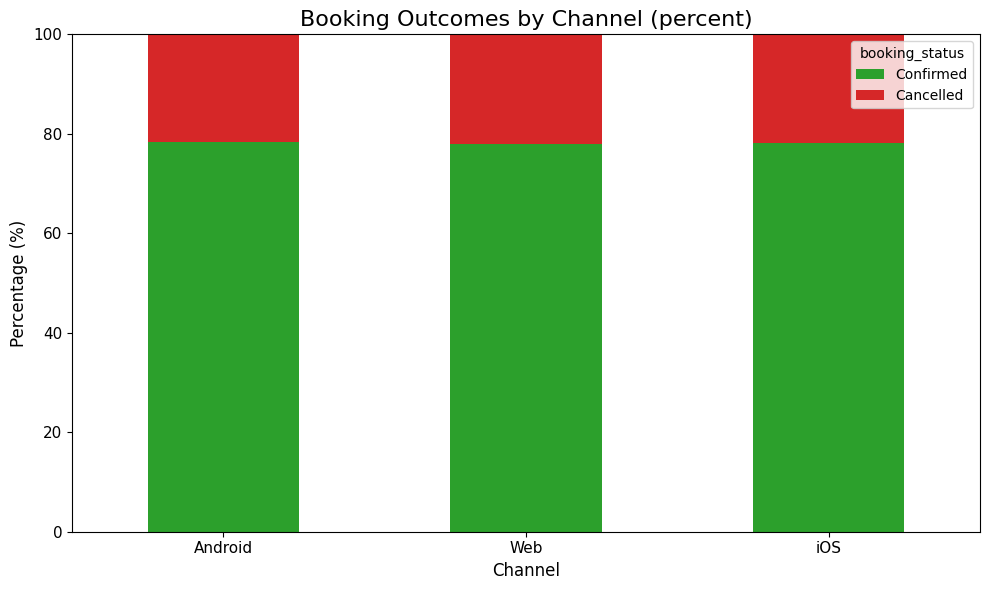

<Figure size 1000x600 with 0 Axes>

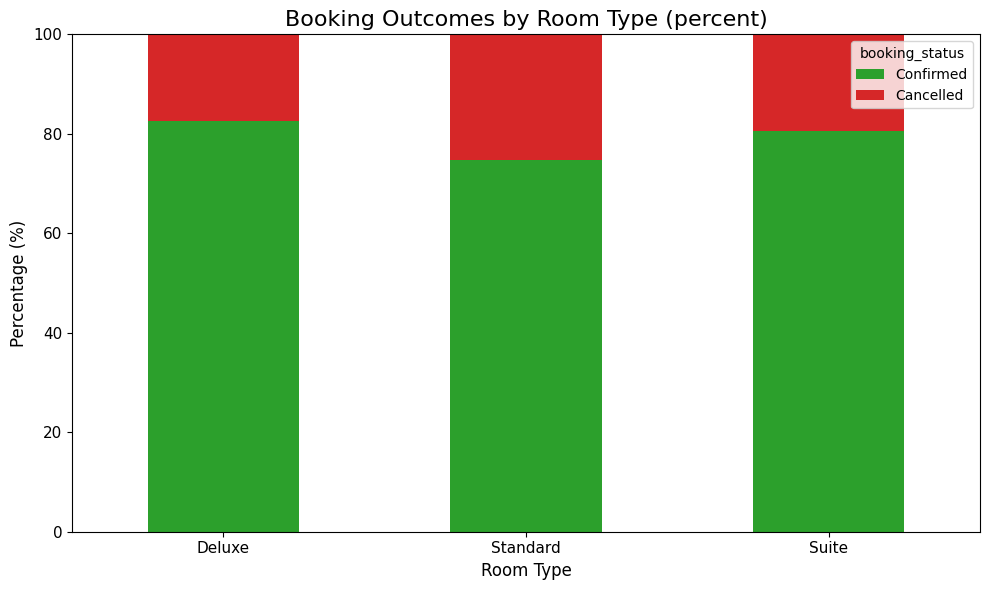

<Figure size 1000x600 with 0 Axes>

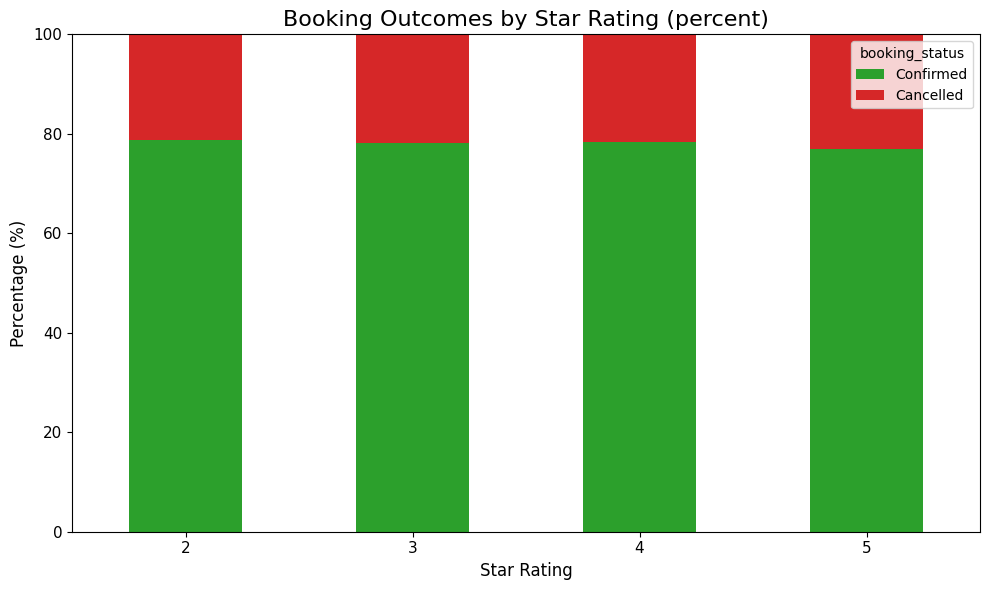

'\n# Parse dates (adjust column names if different)\nfor col in [\'booking_date\', \'check_in_date\', \'check_out_date\']:\n    if col in df.columns:\n        df[col] = pd.to_datetime(df[col], errors=\'coerce\')\n\n# Compute days between booking and check-in for cancelled bookings\nif \'booking_date\' in df.columns and \'check_in_date\' in df.columns:\n    cancelled_dates = df[df[\'booking_status\'] == \'Cancelled\'].copy()\n    cancelled_dates[\'days_before_checkin\'] = (cancelled_dates[\'check_in_date\'] - cancelled_dates[\'booking_date\']).dt.days\n    # Drop negative or NA values\n    cancelled_dates = cancelled_dates[cancelled_dates[\'days_before_checkin\'].notna() & (cancelled_dates[\'days_before_checkin\'] >= 0)]\n    print("\nDays-before-checkin summary for cancelled bookings:")\n    print(cancelled_dates[\'days_before_checkin\'].describe())\n\n    # Plot distribution\n    plt.figure()\n    cancelled_dates[\'days_before_checkin\'].hist(bins=30)\n    plt.title(\'Distribution: Da

In [ ]:
# cancellation_analysis.py
# Requires: pandas, matplotlib
# Run: python cancellation_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# --- CONFIG ---
file_path = '/content/Hotel_bookings_final.csv'  # change if required
save_plots = False   # set True to save PNGs
out_dir = Path('/mnt/data/plots')
out_dir.mkdir(parents=True, exist_ok=True)

plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11
})

# --- LOAD DATA ---
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"File not found: {file_path}", file=sys.stderr)
    raise

# Basic check for required columns
required = {'booking_status', 'channel_of_booking', 'room_type', 'star_rating'}
missing = required - set(df.columns)
if missing:
    raise KeyError(f"Missing required columns: {missing}")

# Filter out 'Failed' if you want to focus on real outcomes
df_outcomes = df[df['booking_status'] != 'Failed'].copy()

# --- AGGREGATIONS: cancellations counts and %shares ---
# 1) Cancelled subset
cancelled = df[df['booking_status'] == 'Cancelled']

# Cancellation distribution across channels (percent of cancelled rows)
cancel_by_channel = (cancelled['channel_of_booking']
                     .value_counts(normalize=True) * 100).sort_index()

# Cancellation distribution across room types
cancel_by_room = (cancelled['room_type']
                  .value_counts(normalize=True) * 100).sort_index()

# Cancellation distribution across star ratings
cancel_by_star = (cancelled['star_rating']
                  .value_counts(normalize=True) * 100).sort_index()

# Cancellation rate (cancelled vs confirmed) per category:
# Example: for channels — percent of bookings per channel that are cancelled vs confirmed
channel_outcomes = (df_outcomes
                    .groupby('channel_of_booking')['booking_status']
                    .value_counts(normalize=True)
                    .unstack(fill_value=0) * 100)

room_outcomes = (df_outcomes
                 .groupby('room_type')['booking_status']
                 .value_counts(normalize=True)
                 .unstack(fill_value=0) * 100)

star_outcomes = (df_outcomes
                 .groupby('star_rating')['booking_status']
                 .value_counts(normalize=True)
                 .unstack(fill_value=0) * 100)

# --- PRINT SUMMARIES ---
print("\n--- Cancellation distribution (share of cancelled bookings) ---")
print("By channel:\n", cancel_by_channel.round(2).to_dict())
print("By room type:\n", cancel_by_room.round(2).to_dict())
print("By star rating:\n", cancel_by_star.round(2).to_dict())

print("\n--- Outcome rates within each category (percent) ---")
print("\nChannel outcomes (Cancelled vs Confirmed):\n", channel_outcomes.round(2))
print("\nRoom outcomes (Cancelled vs Confirmed):\n", room_outcomes.round(2))
print("\nStar outcomes (Cancelled vs Confirmed):\n", star_outcomes.round(2))

# --- PLOTS: stacked bars showing Confirmed vs Cancelled within each category ---
# Channels
plt.figure()
# keep columns order safe
cols = []
if 'Confirmed' in channel_outcomes.columns: cols.append('Confirmed')
if 'Cancelled' in channel_outcomes.columns: cols.append('Cancelled')
channel_outcomes[cols].plot(kind='bar', stacked=True, color=['#2ca02c', '#d62728'], legend=True)
plt.title('Booking Outcomes by Channel (percent)')
plt.ylabel('Percentage (%)')
plt.xlabel('Channel')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
if save_plots:
    plt.savefig(out_dir / 'outcomes_by_channel.png', dpi=150)
plt.show()

# Room type
plt.figure()
cols = []
if 'Confirmed' in room_outcomes.columns: cols.append('Confirmed')
if 'Cancelled' in room_outcomes.columns: cols.append('Cancelled')
room_outcomes[cols].plot(kind='bar', stacked=True, color=['#2ca02c', '#d62728'], legend=True)
plt.title('Booking Outcomes by Room Type (percent)')
plt.ylabel('Percentage (%)')
plt.xlabel('Room Type')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
if save_plots:
    plt.savefig(out_dir / 'outcomes_by_room_type.png', dpi=150)
plt.show()

# Star rating
plt.figure()
cols = []
if 'Confirmed' in star_outcomes.columns: cols.append('Confirmed')
if 'Cancelled' in star_outcomes.columns: cols.append('Cancelled')
# Ensure star rating index is sorted numerically if possible
try:
    star_outcomes = star_outcomes.sort_index()
except Exception:
    pass
star_outcomes[cols].plot(kind='bar', stacked=True, color=['#2ca02c', '#d62728'], legend=True)
plt.title('Booking Outcomes by Star Rating (percent)')
plt.ylabel('Percentage (%)')
plt.xlabel('Star Rating')
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.tight_layout()
if save_plots:
    plt.savefig(out_dir / 'outcomes_by_star_rating.png', dpi=150)
plt.show()

# --- OPTIONAL: analyze "days before check-in" when cancellations happen ---
# Uncomment this block if booking_date and check_in_date are present and parseable
"""
# Parse dates (adjust column names if different)
for col in ['booking_date', 'check_in_date', 'check_out_date']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Compute days between booking and check-in for cancelled bookings
if 'booking_date' in df.columns and 'check_in_date' in df.columns:
    cancelled_dates = df[df['booking_status'] == 'Cancelled'].copy()
    cancelled_dates['days_before_checkin'] = (cancelled_dates['check_in_date'] - cancelled_dates['booking_date']).dt.days
    # Drop negative or NA values
    cancelled_dates = cancelled_dates[cancelled_dates['days_before_checkin'].notna() & (cancelled_dates['days_before_checkin'] >= 0)]
    print("\nDays-before-checkin summary for cancelled bookings:")
    print(cancelled_dates['days_before_checkin'].describe())

    # Plot distribution
    plt.figure()
    cancelled_dates['days_before_checkin'].hist(bins=30)
    plt.title('Distribution: Days before check-in when booking was cancelled')
    plt.xlabel('Days before check-in')
    plt.ylabel('Number of cancellations')
    plt.tight_layout()
    if save_plots:
        plt.savefig(out_dir / 'days_before_checkin_cancellations.png', dpi=150)
    plt.show()
else:
    print('\\nOptional date-based analysis skipped: booking_date or check_in_date not present.')
"""

# --- END ---


In [ ]:
## 2. Root Cause Analysis

In [ ]:
## What might be the reasons for the observed cancellation patterns?


=== Chart 1: Confirmed vs Cancelled (counts) ===
booking_status  Cancelled  Confirmed
room_type                           
Deluxe               1679       7996
Standard             3857      11452
Suite                 534       2224

=== Chart 1: Confirmed vs Cancelled (pct within room type) ===
booking_status  Cancelled  Confirmed
room_type                           
Deluxe              17.35      82.65
Standard            25.19      74.81
Suite               19.36      80.64


<Figure size 900x500 with 0 Axes>

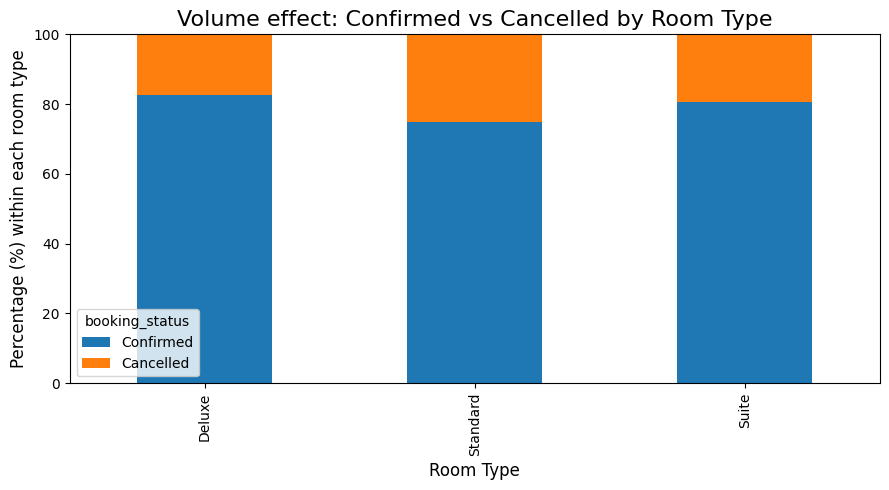

/tmp/ipython-input-2297582349.py:75: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_group = (df_price.groupby('price_band')['booking_status']



=== Chart 2: Cancellation % by price band (using column 'selling_price') ===
booking_status        Cancelled
price_band                     
(5002.999, 19743.25]      21.84
(19743.25, 29752.5]       21.47
(29752.5, 39796.0]        22.43
(39796.0, 50000.0]        21.77


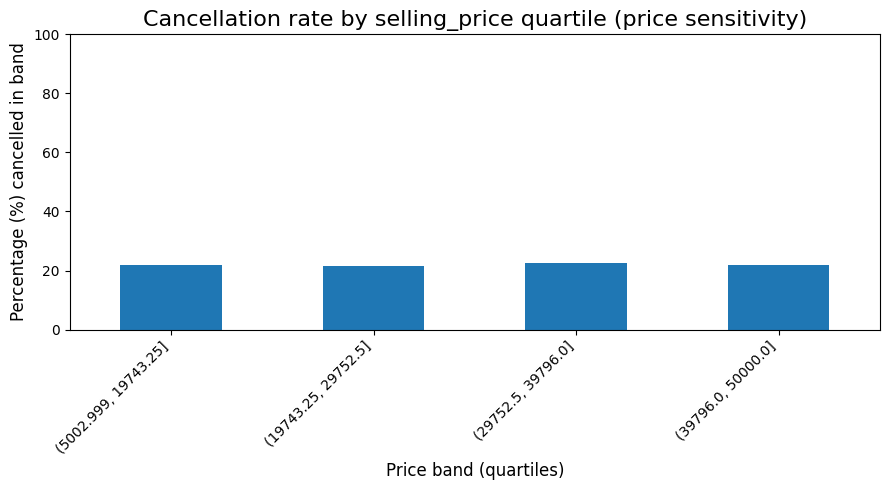


=== Chart 3: Refund % (overall and among cancelled bookings) ===
Overall Refund %            78.37
Refund % among Cancelled    77.94
dtype: float64


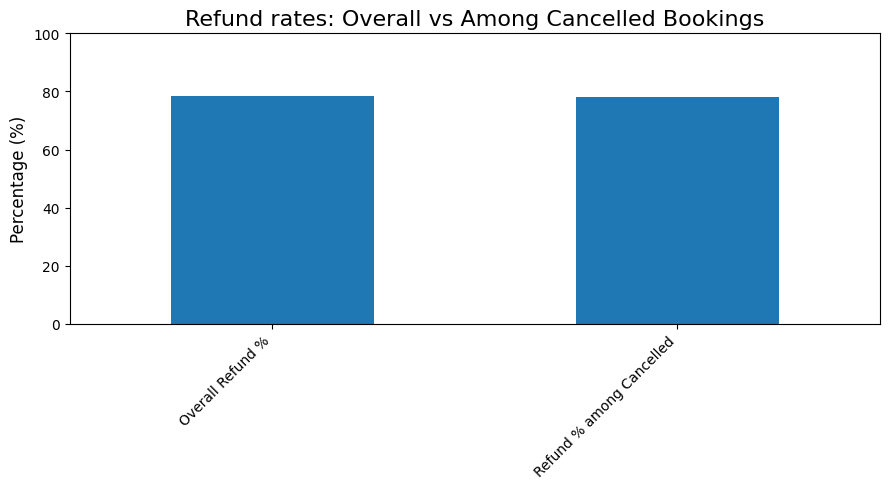

In [ ]:
# top3_cancellation_analysis.py
# Requires: pandas, matplotlib
# Run: python top3_cancellation_analysis.py
# Adjust file_path if your CSV is in a different location.

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# --- CONFIG ---
file_path = '/content/Hotel_bookings_final.csv'  # change if needed
save_plots = False   # set True to save PNG files into out_dir
out_dir = Path('/mnt/data/plots')
out_dir.mkdir(parents=True, exist_ok=True)

plt.rcParams.update({
    'figure.figsize': (9, 5),
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

# --- LOAD DATA ---
df = pd.read_csv(file_path)

# Focus on non-'Failed' outcomes for meaningful Confirmed vs Cancelled comparisons
df_outcomes = df[df['booking_status'] != 'Failed'].copy()

# --- Chart 1: Volume effect (Confirmed vs Cancelled by room_type) ---
# Use counts within each room_type, then convert to percentage for stacked bar
room_outcomes = (df_outcomes.groupby('room_type')['booking_status']
                 .value_counts(normalize=False).unstack(fill_value=0))
room_outcomes_pct = (room_outcomes.div(room_outcomes.sum(axis=1), axis=0) * 100).round(2)

print("\n=== Chart 1: Confirmed vs Cancelled (counts) ===")
print(room_outcomes)  # raw counts
print("\n=== Chart 1: Confirmed vs Cancelled (pct within room type) ===")
print(room_outcomes_pct)

plt.figure()
# Ensure 'Confirmed' and 'Cancelled' exist in columns (some datasets may have slightly different names)
cols = []
if 'Confirmed' in room_outcomes_pct.columns: cols.append('Confirmed')
if 'Cancelled' in room_outcomes_pct.columns: cols.append('Cancelled')
if not cols:
    cols = list(room_outcomes_pct.columns[:2])  # fallback: take first two columns
room_outcomes_pct[cols].plot(kind='bar', stacked=True, legend=True)
plt.title('Volume effect: Confirmed vs Cancelled by Room Type')
plt.ylabel('Percentage (%) within each room type')
plt.xlabel('Room Type')
plt.ylim(0, 100)
plt.tight_layout()
if save_plots:
    plt.savefig(out_dir / 'volume_effect_room_type_pct.png', dpi=150)
plt.show()

# --- Chart 2: Price sensitivity / tentative bookings ---
# Try to find a price column, fallback to coupon usage if price not present
price_candidates = ['selling_price', 'sellingprice', 'price', 'selling_price_usd', 'selling_price_inr']
price_col = next((c for c in price_candidates if c in df.columns), None)

if price_col:
    # Clean and convert numeric values
    df_price = df_outcomes[[price_col, 'booking_status']].dropna(subset=[price_col]).copy()
    df_price[price_col] = pd.to_numeric(df_price[price_col], errors='coerce')
    df_price = df_price[df_price[price_col].notna()]

    # Create quartiles (handles duplicates)
    try:
        df_price['price_band'] = pd.qcut(df_price[price_col], 4, duplicates='drop')
    except ValueError:
        df_price['price_band'] = pd.cut(df_price[price_col], bins=4)

    price_group = (df_price.groupby('price_band')['booking_status']
                   .value_counts(normalize=True).unstack(fill_value=0) * 100).round(2)

    # Determine which column corresponds to cancellations
    cancel_col = 'Cancelled' if 'Cancelled' in price_group.columns else price_group.columns[-1]
    print(f"\n=== Chart 2: Cancellation % by price band (using column '{price_col}') ===")
    print(price_group[[cancel_col]])

    plt.figure()
    price_group[cancel_col].plot(kind='bar')
    plt.title(f'Cancellation rate by {price_col} quartile (price sensitivity)')
    plt.ylabel('Percentage (%) cancelled in band')
    plt.xlabel('Price band (quartiles)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    if save_plots:
        plt.savefig(out_dir / f'cancellation_by_{price_col}_quartile.png', dpi=150)
    plt.show()
else:
    # Fallback: use coupon usage as proxy for promotional/tentative bookings
    if 'Coupon USed?' in df_outcomes.columns:
        coupon_group = (df_outcomes.groupby('Coupon USed?')['booking_status']
                        .value_counts(normalize=True).unstack(fill_value=0) * 100).round(2)
        cancel_col = 'Cancelled' if 'Cancelled' in coupon_group.columns else coupon_group.columns[-1]
        print("\n=== Chart 2 (fallback): Cancellation % by Coupon usage ===")
        print(coupon_group[[cancel_col]])

        plt.figure()
        coupon_group[cancel_col].plot(kind='bar')
        plt.title('Cancellation rate by Coupon usage (proxy for promotions)')
        plt.ylabel('Percentage (%) cancelled')
        plt.xlabel('Coupon USed?')
        plt.ylim(0, 100)
        plt.tight_layout()
        if save_plots:
            plt.savefig(out_dir / 'cancellation_by_coupon_usage.png', dpi=150)
        plt.show()
    else:
        print("\nNo price column or 'Coupon USed?' found — skipping price/coupon chart.")

# --- Chart 3: Flexible cancellation / refund policies ---
if 'refund_status' in df.columns:
    overall_refund = (df['refund_status'].value_counts(normalize=True) * 100).round(2)
    cancelled = df[df['booking_status'] == 'Cancelled']
    refund_among_cancel = (cancelled['refund_status'].value_counts(normalize=True) * 100).round(2)

    overall_yes = overall_refund.get('Yes', 0.0)
    cancel_yes = refund_among_cancel.get('Yes', 0.0)

    compare = pd.Series({'Overall Refund %': overall_yes, 'Refund % among Cancelled': cancel_yes})
    print("\n=== Chart 3: Refund % (overall and among cancelled bookings) ===")
    print(compare)

    plt.figure()
    compare.plot(kind='bar')
    plt.title('Refund rates: Overall vs Among Cancelled Bookings')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    if save_plots:
        plt.savefig(out_dir / 'refund_overall_vs_cancelled.png', dpi=150)
    plt.show()
else:
    print("\nColumn 'refund_status' not present — refund-related chart skipped.")

# --- END ---


In [ ]:
## Why do some booking channels or property types perform better than others?


=== Booking outcomes (%) by channel ===
booking_status      Cancelled  Confirmed  Failed
channel_of_booking                              
Android                 20.00      72.33    7.67
Web                     20.33      72.08    7.59
iOS                     20.37      72.63    7.00


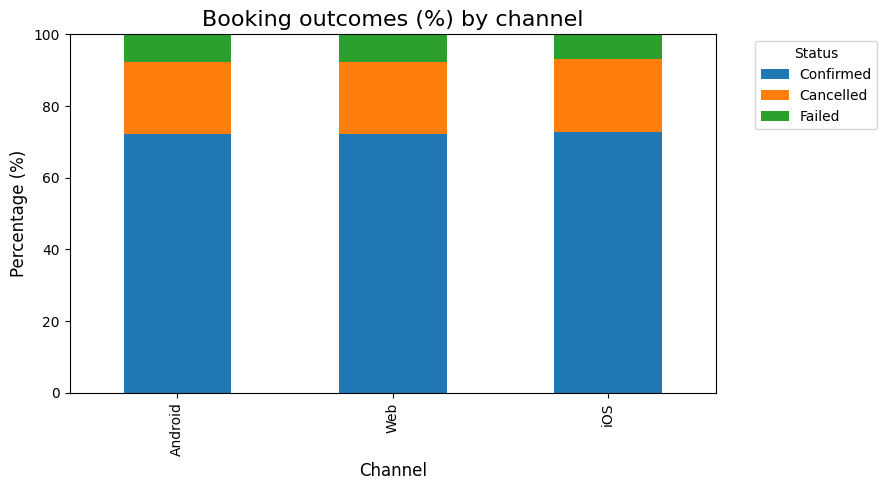


=== Booking volume by room type (counts) ===
  room_type  count
0  Standard  16552
1    Deluxe  10478
2     Suite   2970


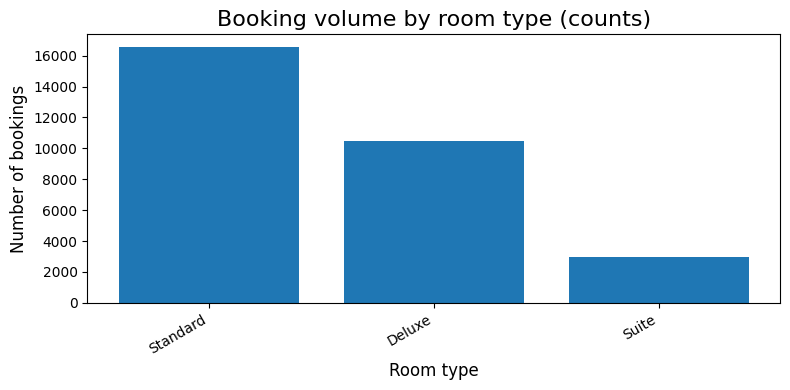


=== Cancellation % by room type ===
booking_status room_type  pct_cancelled
0                 Deluxe          17.35
1               Standard          25.19
2                  Suite          19.36


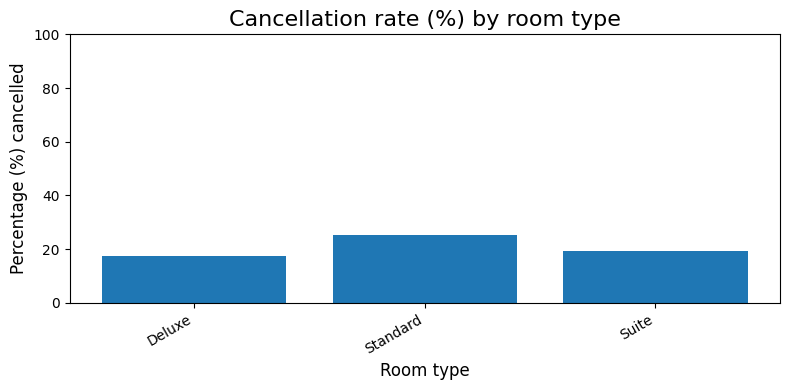


Saved plots to /mnt/data/plots


In [ ]:
# channel_and_roomtype_analysis.py
# Requires: pandas, matplotlib
# Run in notebook or python: python channel_and_roomtype_analysis.py
# (Or run cell-by-cell in Jupyter)

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# --- Config ---
file_path = '/content/Hotel_bookings_final.csv'  # change if necessary
out_dir = Path('/mnt/data/plots')
out_dir.mkdir(parents=True, exist_ok=True)

# --- Load data ---
df = pd.read_csv(file_path)
df.columns = [c.strip() for c in df.columns]  # tidy column names

# Defensive checks
if 'booking_status' not in df.columns:
    raise KeyError("Required column 'booking_status' not found in CSV.")

# Fill missing keys used below so plots won't error
if 'channel_of_booking' not in df.columns:
    df['channel_of_booking'] = 'Unknown'
else:
    df['channel_of_booking'] = df['channel_of_booking'].fillna('Unknown')

if 'room_type' not in df.columns:
    df['room_type'] = 'Unknown'
else:
    df['room_type'] = df['room_type'].fillna('Unknown')

# --- Model 1: Channel conversion & outcomes (stacked %) ---
outcomes_by_channel = (
    df.groupby('channel_of_booking')['booking_status']
      .value_counts(normalize=True)
      .unstack(fill_value=0)
      .multiply(100)
      .round(2)
)

print("\n=== Booking outcomes (%) by channel ===")
print(outcomes_by_channel)

# Plot stacked bar (Confirmed / Cancelled / Failed if present)
cols_order = [c for c in ['Confirmed', 'Cancelled', 'Failed'] if c in outcomes_by_channel.columns]
if not cols_order:
    cols_order = list(outcomes_by_channel.columns)  # fallback

ax = outcomes_by_channel[cols_order].plot(kind='bar', stacked=True, figsize=(9,5))
ax.set_title('Booking outcomes (%) by channel')
ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Channel')
ax.set_ylim(0, 100)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(out_dir / 'outcomes_by_channel_pct.png', dpi=150)
plt.show()

# --- Model 2: Product / inventory effect (room type volume + cancellation rate) ---
# a) Volume by room type (counts)
room_counts = df['room_type'].value_counts().rename_axis('room_type').reset_index(name='count')
print("\n=== Booking volume by room type (counts) ===")
print(room_counts)

plt.figure(figsize=(8,4))
plt.bar(room_counts['room_type'].astype(str), room_counts['count'])
plt.title('Booking volume by room type (counts)')
plt.ylabel('Number of bookings')
plt.xlabel('Room type')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.savefig(out_dir / 'room_type_counts.png', dpi=150)
plt.show()

# b) Cancellation rate by room type (percent) excluding 'Failed' outcomes
df_outcomes = df[df['booking_status'] != 'Failed'].copy()
room_outcomes_pct = (
    df_outcomes.groupby('room_type')['booking_status']
               .value_counts(normalize=True)
               .unstack(fill_value=0)
               .multiply(100)
               .round(2)
)

if 'Cancelled' in room_outcomes_pct.columns:
    room_cancel_pct = room_outcomes_pct[['Cancelled']].reset_index().rename(columns={'Cancelled':'pct_cancelled'})
    print("\n=== Cancellation % by room type ===")
    print(room_cancel_pct)
    plt.figure(figsize=(8,4))
    plt.bar(room_cancel_pct['room_type'].astype(str), room_cancel_pct['pct_cancelled'])
    plt.title('Cancellation rate (%) by room type')
    plt.ylabel('Percentage (%) cancelled')
    plt.xlabel('Room type')
    plt.ylim(0, 100)
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.savefig(out_dir / 'room_type_cancellation_pct.png', dpi=150)
    plt.show()
else:
    print("\nNo 'Cancelled' column in booking_status categories — cannot compute cancellation % by room type.")

# --- End ---
print(f"\nSaved plots to {out_dir.resolve()}")


In [ ]:
## Are there seasonal or temporal trends influencing booking values or stay lengths?


=== Average booking value by month ===
month
1     29726.78
2     30106.36
3     29094.14
4     29250.87
5     29537.94
6     29867.63
7     30037.28
8     29724.49
9     29118.28
10    29049.92
11    29629.03
12    29205.80
Name: price, dtype: float64


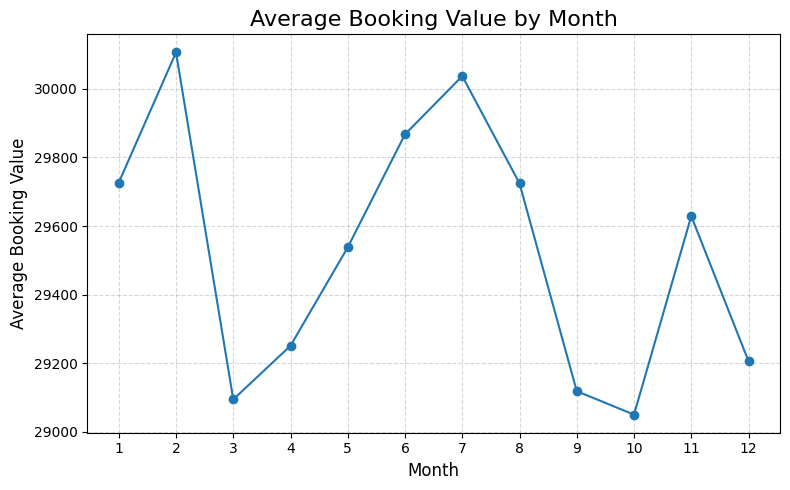


=== Average stay length (days) by month ===
month_in
1     3.93
2     4.01
3     4.01
4     4.03
5     4.02
6     3.99
7     4.03
8     4.04
9     4.01
10    3.98
11    3.97
12    4.06
Name: stay_length, dtype: float64


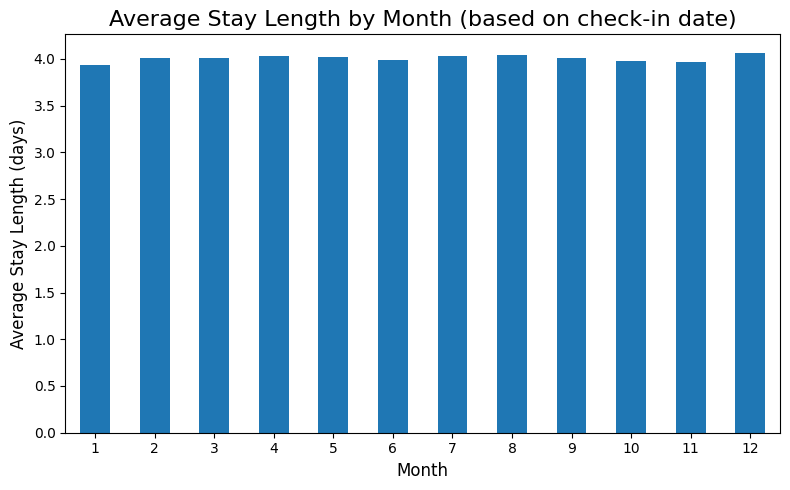

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = '/content/Hotel_bookings_final.csv'
df = pd.read_csv(file_path)

# Parse dates
for c in ['booking_date','check_in_date','check_out_date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# Detect price column
price_candidates = ['selling_price','price','total_amount','amount']
price_col = next((c for c in price_candidates if c in df.columns), None)
if price_col:
    df['price'] = pd.to_numeric(df[price_col], errors='coerce')
else:
    df['price'] = np.nan

# --- Trend 1: Average booking value by month ---
if 'booking_date' in df.columns and price_col:
    df['month'] = df['booking_date'].dt.month
    monthly_value = df.groupby('month')['price'].mean().round(2)
    print("\n=== Average booking value by month ===")
    print(monthly_value)

    plt.figure(figsize=(8,5))
    monthly_value.plot(kind='line', marker='o')
    plt.title('Average Booking Value by Month')
    plt.xlabel('Month')
    plt.ylabel('Average Booking Value')
    plt.xticks(range(1,13))
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# --- Trend 2: Average stay length by month ---
if 'check_in_date' in df.columns and 'check_out_date' in df.columns:
    df['stay_length'] = (df['check_out_date'] - df['check_in_date']).dt.days
    df = df[df['stay_length'].notna() & (df['stay_length'] >= 0)]
    df['month_in'] = df['check_in_date'].dt.month
    monthly_stay = df.groupby('month_in')['stay_length'].mean().round(2)
    print("\n=== Average stay length (days) by month ===")
    print(monthly_stay)

    plt.figure(figsize=(8,5))
    monthly_stay.plot(kind='bar')
    plt.title('Average Stay Length by Month (based on check-in date)')
    plt.xlabel('Month')
    plt.ylabel('Average Stay Length (days)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [ ]:
## 3. Business Recommendations

In [ ]:
## Suggest strategies to reduce cancellations.


=== Cancellation % by stay type ===
booking_status  Cancelled  Confirmed
stay_type                           
Business            21.61      78.39
Leisure             22.06      77.94


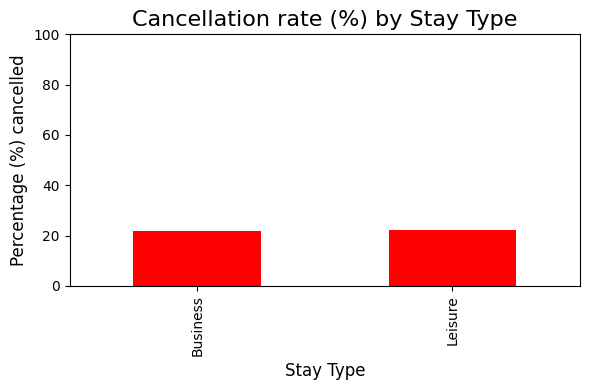

/tmp/ipython-input-1182608884.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_counts = df[df['booking_status'] != 'Failed'].groupby(['lead_band','booking_status']).size().unstack(fill_value=0)



=== Cancellation % by lead time band ===
booking_status  Cancelled  Confirmed
lead_band                           
0-7d                 4.53      95.47
8-30d                4.51      95.49
31-90d               4.52      95.48
91-365d               NaN        NaN
365d+                 NaN        NaN


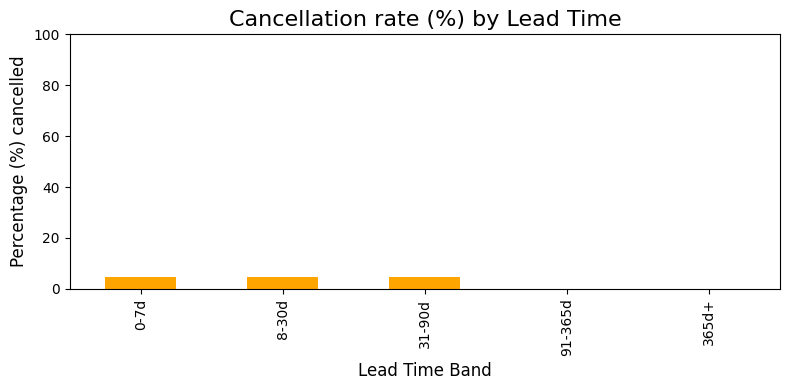

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = '/content/Hotel_bookings_final.csv'
df = pd.read_csv(file_path)

# --- Trend 1: Cancellation rate by stay type ---
stay_outcomes = (df[df['booking_status'] != 'Failed']
                 .groupby('stay_type')['booking_status']
                 .value_counts(normalize=True)
                 .unstack(fill_value=0) * 100).round(2)
print("\n=== Cancellation % by stay type ===")
print(stay_outcomes)

if 'Cancelled' in stay_outcomes.columns:
    plt.figure(figsize=(6,4))
    stay_outcomes['Cancelled'].plot(kind='bar', color='red')
    plt.title('Cancellation rate (%) by Stay Type')
    plt.ylabel('Percentage (%) cancelled')
    plt.xlabel('Stay Type')
    plt.ylim(0,100)
    plt.tight_layout()
    plt.show()

# --- Trend 2: Cancellation rate by lead time ---
for c in ['booking_date','check_in_date']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

df['lead_days'] = (df['check_in_date'] - df['booking_date']).dt.days
df = df[df['lead_days'].notna() & (df['lead_days'] >= 0)]
bins = [0,7,30,90,365,10000]
labels = ['0-7d','8-30d','31-90d','91-365d','365d+']
df['lead_band'] = pd.cut(df['lead_days'], bins=bins, labels=labels, right=True)

lead_counts = df[df['booking_status'] != 'Failed'].groupby(['lead_band','booking_status']).size().unstack(fill_value=0)
lead_outcomes = (lead_counts.div(lead_counts.sum(axis=1), axis=0) * 100).round(2)
print("\n=== Cancellation % by lead time band ===")
print(lead_outcomes)

if 'Cancelled' in lead_outcomes.columns:
    plt.figure(figsize=(8,4))
    lead_outcomes['Cancelled'].plot(kind='bar', color='orange')
    plt.title('Cancellation rate (%) by Lead Time')
    plt.ylabel('Percentage (%) cancelled')
    plt.xlabel('Lead Time Band')
    plt.ylim(0,100)
    plt.tight_layout()
    plt.show()


In [ ]:
## Recommend ways to improve profitability and increase repeat bookings.


=== Average revenue per booking by channel (Confirmed) ===
                    bookings  avg_gross   avg_net
channel_of_booking                               
Android                 6875   29599.39  28950.10
Web                    11549   29422.55  28777.79
iOS                     3248   29389.86  28720.55


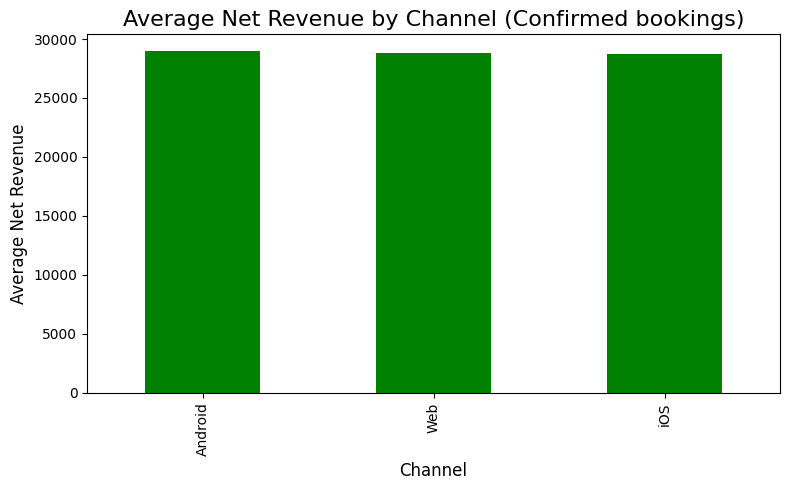


=== Cancellation % by Coupon usage ===
booking_status  Cancelled  Confirmed
Coupon USed?                        
No                  21.69      78.31
Yes                 22.62      77.38


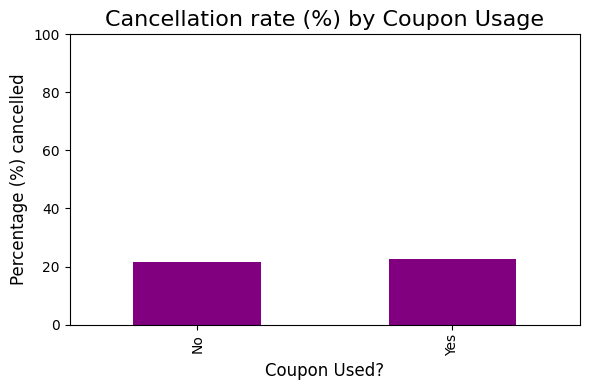

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = '/content/Hotel_bookings_final.csv'
df = pd.read_csv(file_path)

# --- Revenue calculations ---
price_candidates = ['selling_price','sellingprice','price','total_amount','amount']
price_col = next((c for c in price_candidates if c in df.columns), None)
if price_col:
    df['gross_price'] = pd.to_numeric(df[price_col], errors='coerce')
else:
    df['gross_price'] = np.nan

discount_candidates = ['coupon_redeem','coupon_redeemed','coupon_amount','discount','discount_amount','cashback']
df['discounts'] = 0.0
for c in discount_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0.0)
        df['discounts'] += df[c]

refund_candidates = ['refund_amount','refund_amt','refund_value','refund']
df['refund_amt'] = 0.0
for c in refund_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0.0)
        df['refund_amt'] += df[c]

df['net_revenue_est'] = df['gross_price'] - df['discounts'] - df['refund_amt']

# --- Trend 1: Average net revenue by channel ---
confirmed = df[df['booking_status']=='Confirmed'].copy()
revenue_by_channel = confirmed.groupby('channel_of_booking').agg(
    bookings=('booking_status','count'),
    avg_gross=('gross_price','mean'),
    avg_net=('net_revenue_est','mean')
).round(2)
print("\n=== Average revenue per booking by channel (Confirmed) ===")
print(revenue_by_channel)

plt.figure(figsize=(8,5))
revenue_by_channel['avg_net'].plot(kind='bar', color='green')
plt.title('Average Net Revenue by Channel (Confirmed bookings)')
plt.ylabel('Average Net Revenue')
plt.xlabel('Channel')
plt.tight_layout()
plt.show()

# --- Trend 2: Coupon usage vs cancellation rate ---
if 'Coupon USed?' in df.columns:
    coupon_outcomes = (df[df['booking_status'] != 'Failed']
                       .groupby('Coupon USed?')['booking_status']
                       .value_counts(normalize=True)
                       .unstack(fill_value=0) * 100).round(2)
    print("\n=== Cancellation % by Coupon usage ===")
    print(coupon_outcomes)

    if 'Cancelled' in coupon_outcomes.columns:
        plt.figure(figsize=(6,4))
        coupon_outcomes['Cancelled'].plot(kind='bar', color='purple')
        plt.title('Cancellation rate (%) by Coupon Usage')
        plt.ylabel('Percentage (%) cancelled')
        plt.xlabel('Coupon Used?')
        plt.ylim(0,100)
        plt.tight_layout()
        plt.show()


In [ ]:
##  Identify opportunities to optimize pricing, promotions, or channel strategy.

/tmp/ipython-input-4246228398.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_outcomes = (df_price.groupby('price_band')['booking_status']



=== Cancellation % by price band ===
booking_status  Cancelled  Confirmed
price_band                          
Q1                  21.84      78.16
Q2                  21.47      78.53
Q3                  22.43      77.57
Q4                  21.77      78.23


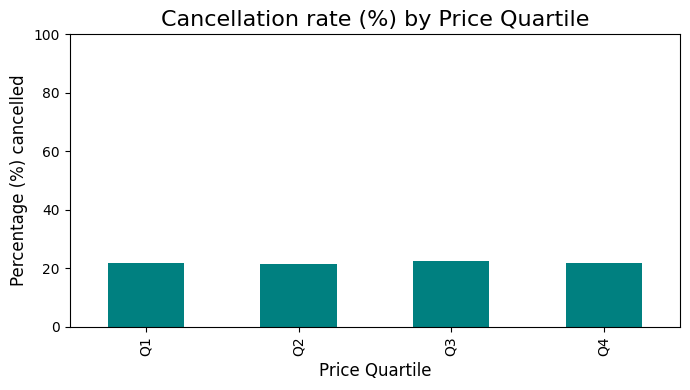


=== Channel revenue & cancellation summary ===
                     avg_net  bookings  cancel_pct
channel_of_booking                                
Android             28950.10      6875       21.66
Web                 28777.79     11549       22.00
iOS                 28720.55      3248       21.90


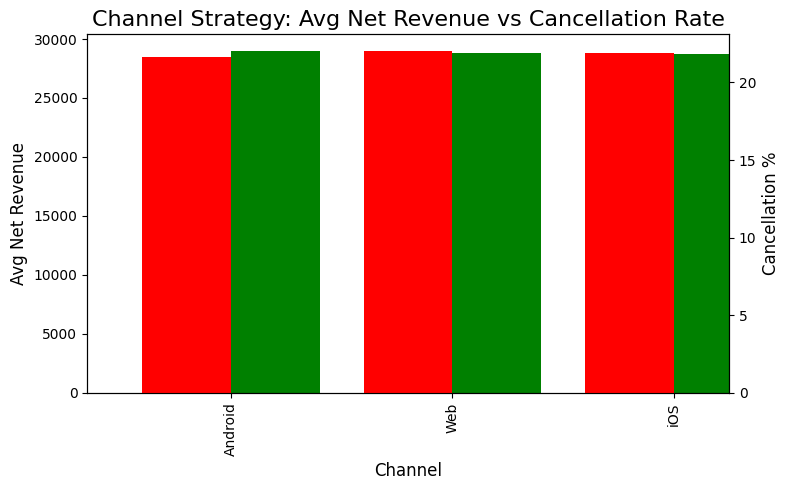

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = '/content/Hotel_bookings_final.csv'
df = pd.read_csv(file_path)

# Price prep
price_candidates = ['selling_price','sellingprice','price','total_amount','amount']
price_col = next((c for c in price_candidates if c in df.columns), None)
if price_col:
    df['price'] = pd.to_numeric(df[price_col], errors='coerce')
else:
    df['price'] = np.nan

# Discounts/refunds
discount_candidates = ['coupon_redeem','coupon_redeemed','coupon_amount','discount','discount_amount','cashback']
df['discounts'] = 0.0
for c in discount_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0.0)
        df['discounts'] += df[c]

refund_candidates = ['refund_amount','refund_amt','refund_value','refund']
df['refund_amt'] = 0.0
for c in refund_candidates:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0.0)
        df['refund_amt'] += df[c]

df['net_revenue_est'] = df['price'] - df['discounts'] - df['refund_amt']

# --- Trend 1: Cancellation rate by price quartile ---
df_outcomes = df[df['booking_status'] != 'Failed'].copy()
df_price = df_outcomes[['price','booking_status']].dropna().copy()
df_price['price_band'] = pd.qcut(df_price['price'], 4, labels=['Q1','Q2','Q3','Q4'])
price_outcomes = (df_price.groupby('price_band')['booking_status']
                  .value_counts(normalize=True)
                  .unstack(fill_value=0) * 100).round(2)
print("\n=== Cancellation % by price band ===")
print(price_outcomes)

if 'Cancelled' in price_outcomes.columns:
    plt.figure(figsize=(7,4))
    price_outcomes['Cancelled'].plot(kind='bar', color='teal')
    plt.title('Cancellation rate (%) by Price Quartile')
    plt.ylabel('Percentage (%) cancelled')
    plt.xlabel('Price Quartile')
    plt.ylim(0,100)
    plt.tight_layout()
    plt.show()

# --- Trend 2: Net revenue vs cancellation rate by channel ---
confirmed = df[df['booking_status']=='Confirmed'].copy()
revenue_by_channel = confirmed.groupby('channel_of_booking').agg(
    avg_net=('net_revenue_est','mean'),
    bookings=('booking_status','count')
).round(2)

outcomes_by_channel = (df[df['booking_status'] != 'Failed']
                       .groupby('channel_of_booking')['booking_status']
                       .value_counts(normalize=True)
                       .unstack(fill_value=0) * 100).round(2)

channel_summary = revenue_by_channel.join(outcomes_by_channel['Cancelled'], how='left').rename(columns={'Cancelled':'cancel_pct'})
print("\n=== Channel revenue & cancellation summary ===")
print(channel_summary)

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()
channel_summary['avg_net'].plot(kind='bar', ax=ax1, color='green', position=0, width=0.4)
channel_summary['cancel_pct'].plot(kind='bar', ax=ax2, color='red', position=1, width=0.4)
ax1.set_ylabel('Avg Net Revenue')
ax2.set_ylabel('Cancellation %')
plt.title('Channel Strategy: Avg Net Revenue vs Cancellation Rate')
ax1.set_xlabel('Channel')
plt.tight_layout()
plt.show()
